In [1]:
import pandas as pd

endangered_languages = pd.read_csv(
    './data_sets/endangered_languages_final.csv', index_col=0)

In [2]:
endangered_languages.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [3]:
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, South Italian to Scanian
Data columns (total 12 columns):
Countries Where Spoken        2697 non-null object
Country Code                  2697 non-null object
Degree of Endangerment        2697 non-null object
Speakers                      2514 non-null float64
Latitude                      2694 non-null float64
Longitude                     2694 non-null float64
Fertility Rate Avg            2697 non-null float64
2018 Rank                     2097 non-null float64
2018 Score                    2097 non-null float64
2018 Band                     2097 non-null object
Number of Countries Spoken    2697 non-null int64
GDP Average (Current US $)    2697 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 273.9+ KB


In [4]:
missing_rank = endangered_languages[endangered_languages['2018 Rank'].isnull()]

In [5]:
missing_rank['Country Code'].unique()

array(['ISR', 'NER', 'NPL', 'MLI', 'ARM', 'BTN', 'MDA', 'LVA', 'KEN',
       'TJK', 'SDN', 'LAO', 'YEM', 'GUM', 'EST', 'GRL', 'TZA', 'LSO',
       'GUY', 'GNB', 'BWA', 'UGA', 'PYF', 'BLZ', 'GIN', 'GHA', 'PNG',
       'TCD', 'PRY', 'BFA', 'CAF', 'FSM', 'NAM', 'CMR', 'COG', 'MRT',
       'GAB', 'ERI', 'FJI', 'TLS', 'BEN', 'CIV', 'SUR', 'CYP', 'SLB',
       'NCL', 'VUT', 'PLW', 'MNG', 'SLE'], dtype=object)

In [6]:
import plotly.plotly as py
import cufflinks as cf

In [7]:
%matplotlib inline

In [8]:
import plotly.graph_objs as go

In [9]:
speakers = endangered_languages[endangered_languages['Speakers'].notnull()]

In [10]:
# data = [go.Bar(
#             x=speakers['Language'],
#             y=speakers['Speakers']
#     )]
# py.iplot(data, filename='basic-bar')

In [11]:
speakers.head(2)

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [12]:
speakers.index.values

array(['South Italian', 'Sicilian', 'Lombard', ..., 'Mo-peng', 'Sei',
       'Island Carib'], dtype=object)

In [13]:
import seaborn as sns

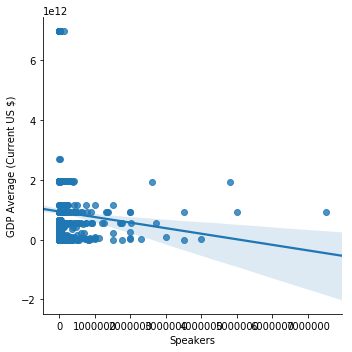

In [14]:
sns.lmplot(x='Speakers', y='GDP Average (Current US $)', data=speakers)

In [16]:
speakers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2514 entries, South Italian to Island Carib
Data columns (total 12 columns):
Countries Where Spoken        2514 non-null object
Country Code                  2514 non-null object
Degree of Endangerment        2514 non-null object
Speakers                      2514 non-null float64
Latitude                      2511 non-null float64
Longitude                     2511 non-null float64
Fertility Rate Avg            2514 non-null float64
2018 Rank                     1933 non-null float64
2018 Score                    1933 non-null float64
2018 Band                     1933 non-null object
Number of Countries Spoken    2514 non-null int64
GDP Average (Current US $)    2514 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 335.3+ KB


In [17]:
endangered_languages_complete = endangered_languages.dropna()

In [18]:
endangered_languages_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, South Italian to Island Carib
Data columns (total 12 columns):
Countries Where Spoken        1931 non-null object
Country Code                  1931 non-null object
Degree of Endangerment        1931 non-null object
Speakers                      1931 non-null float64
Latitude                      1931 non-null float64
Longitude                     1931 non-null float64
Fertility Rate Avg            1931 non-null float64
2018 Rank                     1931 non-null float64
2018 Score                    1931 non-null float64
2018 Band                     1931 non-null object
Number of Countries Spoken    1931 non-null int64
GDP Average (Current US $)    1931 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 196.1+ KB


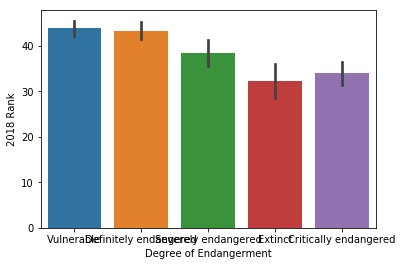

In [19]:
ax = sns.barplot(x='Degree of Endangerment', y='2018 Rank', data=endangered_languages_complete)

In [22]:
italy = endangered_languages_complete.groupby(endangered_languages_complete['Country Code']).get_group('ITA')

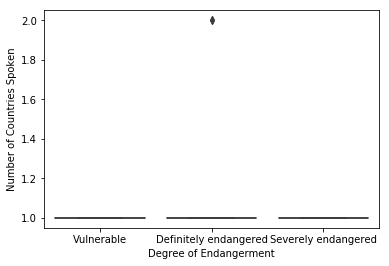

In [26]:
it = sns.boxplot(x='Degree of Endangerment', y='Number of Countries Spoken', data=italy)

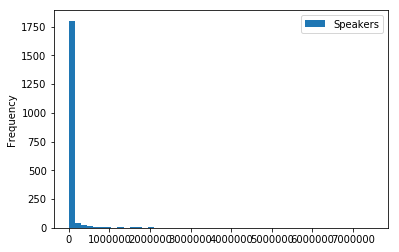

In [31]:
import matplotlib.pyplot as plt
endangered_languages_complete.plot(kind='hist', y='Speakers', bins=50)
plt.show()

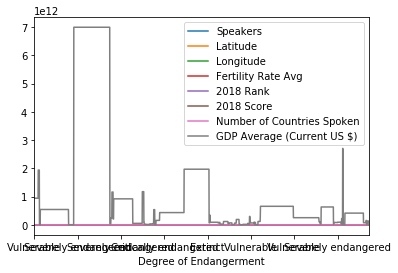

In [33]:
endangered_languages_complete.plot(x='Degree of Endangerment')
plt.show()

In [34]:
endangered_languages_complete.tail(6)

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
|Xam,South Africa,ZAF,Extinct,0.0,-32.2853,20.7590,4.146000,7.0,66.52,Very High Proficiency,1,1.350331e+11
ǁKu ǁ'e,South Africa,ZAF,Extinct,0.0,-29.9739,27.0812,4.146000,7.0,66.52,Very High Proficiency,1,1.350331e+11
ǁKx'au,South Africa,ZAF,Extinct,0.0,-32.2896,21.7968,4.146000,7.0,66.52,Very High Proficiency,1,1.350331e+11
ǁXegwi,South Africa,ZAF,Extinct,0.0,-25.3500,30.9900,4.146000,7.0,66.52,Very High Proficiency,1,1.350331e+11
Karaim (Lithuania),Lithuania,LTU,Severely endangered,50.0,54.6420,24.9499,1.896111,27.0,57.81,High Proficiency,1,2.866575e+10
Island Carib,Dominica,DMA,Extinct,0.0,15.4325,-61.2817,2.888571,38.0,54.97,Moderate Proficiency,1,2.932216e+08


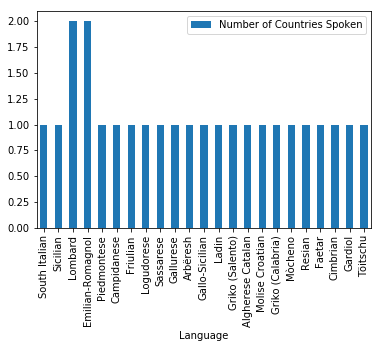

In [37]:
italy[['Number of Countries Spoken']].plot(kind='bar')

In [38]:
high_proficiency = endangered_languages_complete.groupby(['2018 Band']).get_group('High Proficiency')

In [40]:
high_proficiency.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
Venetan,"Croatia, Italy, Slovenia",HRV,Vulnerable,2000000.0,45.4601,12.1948,1.782148,18.0,60.16,High Proficiency,3,4.377542e+10
Vojvodina Rusyn,"Croatia, Serbia",HRV,Definitely endangered,30000.0,45.6351,19.1903,1.782148,18.0,60.16,High Proficiency,2,4.377542e+10
Arbanasi,Croatia,HRV,Severely endangered,500.0,44.0994,15.2545,1.782148,18.0,60.16,High Proficiency,1,4.377542e+10
Istriot,Croatia,HRV,Severely endangered,400.0,45.0541,13.7246,1.782148,18.0,60.16,High Proficiency,1,4.377542e+10
Istro-Romanian,Croatia,HRV,Severely endangered,300.0,45.3907,14.4360,1.782148,18.0,60.16,High Proficiency,1,4.377542e+10


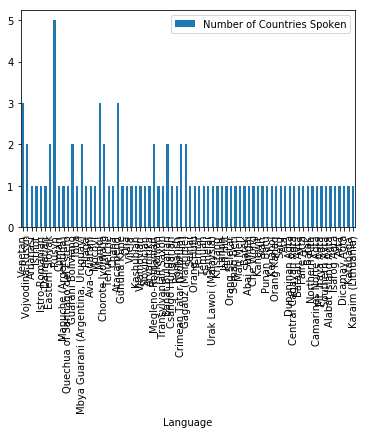

In [41]:
high_proficiency[['Number of Countries Spoken']].plot(kind='bar')

In [42]:
high_proficiency.plot(kind='bar', x)

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Venetan to Karaim (Lithuania)
Data columns (total 12 columns):
Countries Where Spoken        74 non-null object
Country Code                  74 non-null object
Degree of Endangerment        74 non-null object
Speakers                      74 non-null float64
Latitude                      74 non-null float64
Longitude                     74 non-null float64
Fertility Rate Avg            74 non-null float64
2018 Rank                     74 non-null float64
2018 Score                    74 non-null float64
2018 Band                     74 non-null object
Number of Countries Spoken    74 non-null int64
GDP Average (Current US $)    74 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 7.5+ KB
